# 决策树 ID3 CART

## 2.2.1决策树
**树状模型用于分类和回归**\
**选择最优特征**\
应最大程度区分样本\
衡量指标包括信息增益、基尼指数等\
**信息熵**
\begin{equation}
H(S) = -\sum_{i=1}^{} P_i \log_2 P_i
\end{equation}
**条件熵**
\begin{equation}
H(Y|X) = \sum_{x \in X} p(x) H(Y|X=x)
= -\sum_{x \in X} \sum_{y \in Y} p(x, y) \log_2 p(y|x)
\end{equation}

**信息增益公式**
\begin{equation}
\text{Gain}(S, A) =H(S)-H(S|A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)
\end{equation}

## 2.2.2 ID3与CART算法
| 特性维度 | **ID3算法** | **CART算法** |
|---------|------------|------------|
| **算法类型** | 分类树 | **分类与回归树** |
| **分裂准则** | **信息增益** | **Gini指数（分类）/ 均方误差（回归）** |
| **树结构** | 多叉树 | **二叉树** |
| **输出类型** | 分类（离散值） | **分类与连续值** |
| **特征选择** | 多值特征优先（信息增益偏好多值特征） | **更均衡** |
| **缺失值处理** | 不支持 | **支持** |
| **剪枝方式** | 无（早期ID3） | **代价复杂度剪枝** |
| **连续特征** | 不支持（需离散化） | **直接支持** |
- **ID3**：
使用**信息增益** 
\begin{equation}
Gain(S, A) = H(S) - H(S|A)
\end{equation}
问题：对可取值多的特征有偏好
改进：C4.5使用**增益率**解决此问题
- **CART**：
**分类**：使用**Gini指数** 
\begin{equation}
\text{Gini}(S) = 1 - \sum_{i=1}^{C} p_i^2
\end{equation}
更简单，计算量小
无需对数运算
对类别分布敏感
**回归**：使用**均方误差(MSE)**或**平均绝对误差(MAE)**
\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^2
\end{equation}
### **选择ID3/C4.5当**：
1. 纯分类问题
2. 需要直观理解特征重要性
3. 特征多为离散值
4. 数据量较小，对计算效率要求不高
### **选择CART当**：
1. 同时需要分类和回归
2. 数据包含连续特征
3. 需要更健壮的模型
4. 关注模型泛化能力（通过剪枝）
5. 数据有缺失值需要处理

## 2.2.3鸢尾花数据集决策树

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
from sklearn.model_selection import train_test_split

iris_x = iris.data
iris_y = iris.target
print("数据集大小：", iris_x.shape)
print("标签：",iris.target_names)
print("数据属性：",iris.feature_names)

x_train,x_test,y_train,y_test = train_test_split(iris_x,iris_y,test_size=0.3)
print("训练集大小：",len(x_train))
print("测试集大小：",len(x_test))

数据集大小： (150, 4)
标签： ['setosa' 'versicolor' 'virginica']
数据属性： ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
训练集大小： 105
测试集大小： 45


In [2]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("预测数据：",y_pred)
print("实时数据：",y_test)
print("训练集score:{:.4f}".format(clf.score(x_train,y_train)))
print("测试集score:{:.4f}".format(clf.score(x_test,y_test)))


预测数据： [1 2 1 0 1 0 0 0 2 2 1 2 0 2 2 1 0 1 2 0 2 1 1 2 2 1 1 0 2 0 2 0 1 0 0 0 1
 1 1 1 0 2 1 0 1]
实时数据： [1 1 1 0 2 0 0 0 2 2 1 2 0 2 2 1 0 2 2 0 2 1 1 2 2 1 1 0 2 0 2 0 1 0 0 0 1
 1 1 1 0 2 1 0 1]
训练集score:1.0000
测试集score:0.9333


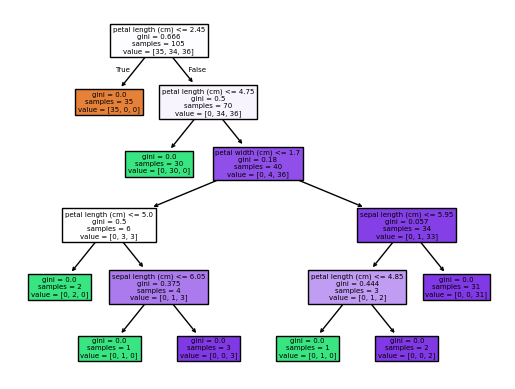

In [3]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(clf,filled=True,feature_names=iris.feature_names)
plt.show()